**Name** : Soham Shivaji Shinde

**E-mail id** : shindesoham390@gmail.com

**Major Project** : Sentiment analysis for a dataset of the ‘restaurant review’ by using Support vector classifier(SVM) and count vectorizer using
two methods to predict the label of the review either positive or negative.



----


**Summary of the Major Project:-**
1. Creating a Dataframe
2. Processing the Data
  
      *-Cleaning the Data*

      *-Doing Data visualizations:- Representing using **Matplotlib/Seaborn**.*
3. **Method 1**:- Creating SVC Model and Count Vectorizer separately
4. **Method 2**:- Creating a Pipeline with Vectorization Model & ML algorithm to predict the Final Sentiment.
5. **Method 1**:- Creating a NB model and Count Vectorizer separately.
6. **Method 2**:- Creating a Pipeline with Vectorization Model & ML algorithm to predict the final sentiment for the multinomialNB and CountVectorizer
7. Using **Joblib** to Create and Saving it as a Model *(USING THE MODEL WITH THE **HIGHEST ACCURACY**).*
8. Using the New Model Created using Joblib, Predicting the Output of a New Review
9. Creating a **Streamlit Webapp** for Sentiment Analysis using the Joblib Model




In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Creating a Dataframe**

In [2]:
# Loading the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv' , delimiter='\t' , quoting=3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**2. Processing the Data**

In [3]:
# Checking the first 5 dataset rows
dataset.head() 

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# checking Datatype of Columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
# Checking any NaN values
dataset.isna().sum()

Review    0
Liked     0
dtype: int64

In [6]:
# Checking the Total Rows & Columns
dataset.shape

(1000, 2)

**Cleaning the Data**

In [7]:
# Removing the Duplicate Reviews
dataset = dataset.drop_duplicates(keep = 'last')
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [8]:
dataset['Review'][500]

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"

In [9]:
dataset['Liked'][500]

1

In [10]:
dataset['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

In [11]:
dataset.replace(to_replace=1 , value='Positive' , inplace= True)
dataset.replace(to_replace=0 , value='Negative' , inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
dataset

,Review,Liked
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive
...,...,...
995,I think food should have flavor and texture an...,Negative
996,Appetite instantly gone.,Negative
997,Overall I was not impressed and would not go b...,Negative
998,"The whole experience was underwhelming, and I ...",Negative


**Doing Data visualizations:- Representing using Matplotlib**


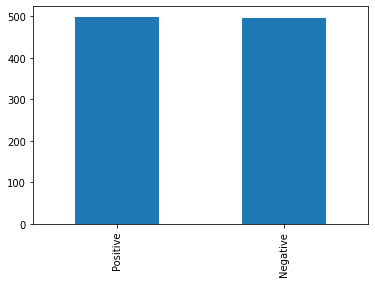

In [13]:
# Representing using Matplotlib
dataset['Liked'].value_counts().plot(kind='bar')

**Data visualizations:- Using Seaborn the number
                        of positive & negative reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


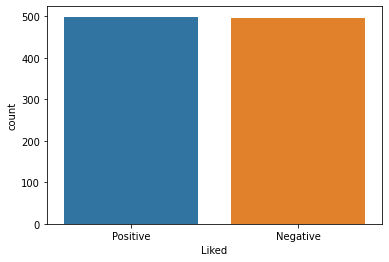

In [14]:
# Representing using Seaborn
sns.countplot(dataset['Liked'])

In [15]:
x = dataset['Review'].values
x

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.'

In [16]:
y = dataset['Liked'].values

**Model Building**

In [17]:
# IMPORTING TRAIN ,TEST & SPLIT LIBRARY
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [18]:
x_train.shape

(747,)

In [19]:
x_test.shape

(249,)

In [20]:
# Importing Count Vectorizer Model separately
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [21]:
# Here all the Text is Converted into Numerical Values
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**3. Method 1:- Creating SVC Model and Count Vectorizer separately**

In [22]:
# Method 1:- Creating SVC Model and Count Vectorizer separately
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [23]:
y_pred = model.predict(x_test_vect)
y_pred

array(['Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [24]:
from sklearn.metrics import accuracy_score # Importing library 
score1 = accuracy_score(y_pred,y_test)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Scores ----
Accuracy score is: 72.69%


**Analysing model**

In [25]:
# Analysing the 1st Model using all the values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.80      0.70      0.74       142
    Positive       0.66      0.77      0.71       107

    accuracy                           0.73       249
   macro avg       0.73      0.73      0.73       249
weighted avg       0.74      0.73      0.73       249



In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[99, 43],
       [25, 82]])

Text(69.0, 0.5, 'Actual')

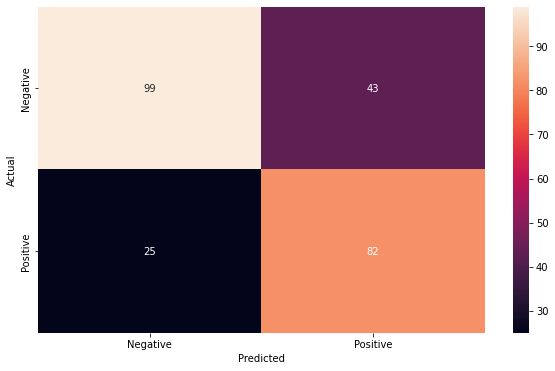

In [27]:
# Plotting Confusion Matrix using Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

**4. Method 2:- Creating a Pipeline with Vectorization Model & ML algorithm to predict the
Final Sentiment.**

In [28]:
# Method 2 :- Creating a pipeline 
# SVC + Countvectorizer
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [29]:
# Checking the accuracy score
score2 = accuracy_score(y_pred2,y_test)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score2*100,2)))

---- Scores ----
Accuracy score is: 81.53%


In [30]:
# Analysing our 2nd Model using all the values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81       124
    Positive       0.82      0.82      0.82       125

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
cm

array([[101,  23],
       [ 23, 102]])

Text(69.0, 0.5, 'Actual')

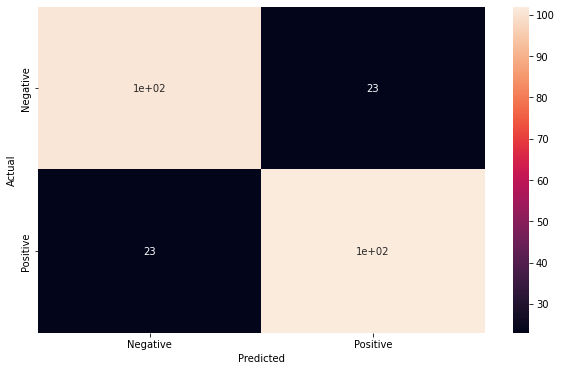

In [32]:
# plotting using Matplotlib
cm=confusion_matrix(y_pred2,y_test)
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

**5. Method 1:- Creating a NB model and Count Vectorizer separately.**

In [33]:
# Method 3 :- Creating our 3rd Model - Navie Bayes Model
# creating NB model and Count vectorizer Separately

from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [34]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [35]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [36]:
# Finding the Accuracy Score
score3 = accuracy_score(y_pred3,y_test)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 74.7%


In [37]:
# Analysiing our 3rd Model
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73       113
    Positive       0.79      0.73      0.76       136

    accuracy                           0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249



In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred3,y_test)
cm

array([[87, 26],
       [37, 99]])

Text(69.0, 0.5, 'Actual')

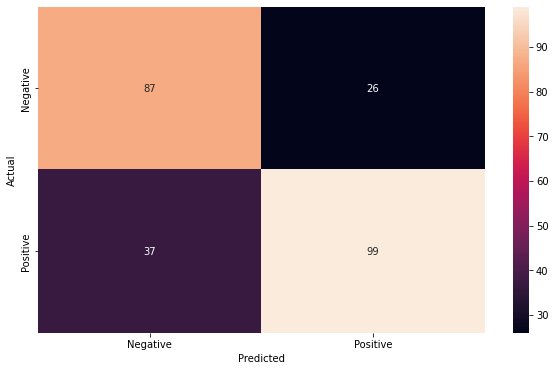

In [39]:
# Confusion Matrix plotting using Matplotlib
cm=confusion_matrix(y_pred3,y_test)
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

**6. Method 2:- Creating a Pipeline with Vectorization Model & ML algorithm to predict the
final sentiment for the multinomialNB and CountVectorizer**

In [40]:
# Method 4 :- Creating our 4th model using the pipeline
# NB + CountVectorizer pipeline
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array(['Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [41]:
# Checking he accuracy score
score4 = accuracy_score(y_pred4,y_test)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score4*100,2)))

---- Scores ----
Accuracy score is: 77.91%


In [42]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       127
    Positive       0.77      0.79      0.78       122

    accuracy                           0.78       249
   macro avg       0.78      0.78      0.78       249
weighted avg       0.78      0.78      0.78       249



In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred4,y_test)
cm

array([[98, 29],
       [26, 96]])

Text(69.0, 0.5, 'Actual')

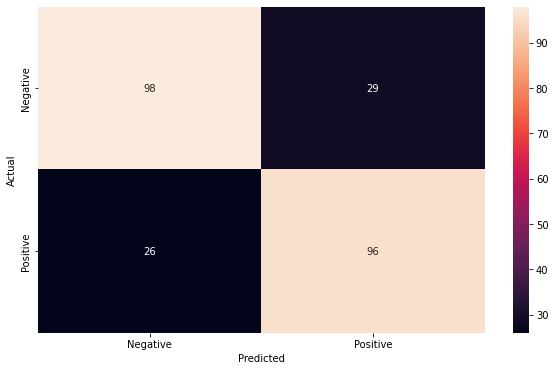

In [44]:
cm=confusion_matrix(y_pred4,y_test)
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
                       # Comparing the Accuracy score for all the 4 models & using the joblib with the highest model accuracy score.

# accuracy score Method 1 - 0.7269076305220884 = 72.69% (SVC)                          Model 1
# accuracy score Method 2 - 0.8152610441767069 = 81.53% (SVC pipeline)                 Model 2   --- HIGHEST ACCURACY
# accuracy score Method 1 - 0.7469879518072289 = 74.7%  (MultinomialNB)                Model 3
# accuracy score Method 2 - 0.7791164658634538 = 77.91% (MultinomialNB pipeline)       Model 4

**7. Using Joblib to Create and Save it as a Model *(USING THE MODEL WITH THE HIGHEST
ACCURACY)*.**

In [46]:
# Creating a file & storing a Model with highest acuracy inside a Joblib
import joblib 
joblib.dump(model2,'Sentiment Analysis') #1. Serialization step

['Sentiment Analysis']

In [47]:
# 2. Deserialization step
# using the stored model in realtime applications
import joblib
reload_model2 = joblib.load('/content/Sentiment Analysis')

**8. Using the New Model Created using Joblib, Predicting the Output of a New Review**

In [48]:
#  Predicting the Output of a New Review using our model
reload_model2.predict(['“I really hate the new design of your website!”'])

array(['Negative'], dtype=object)

In [49]:
reload_model2.predict(['The food is really good here.'])

array(['Positive'], dtype=object)

**9. Creating a Streamlit Webapp for Sentiment Analysis using the Joblib Model** 

In [50]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet

In [51]:
# Designing our Streamlit Web app 
%%writefile app.py
import streamlit as st
import joblib
st.title("Sentimental Analysis 👏") # Adding Title to Webapp
st.header('Enter your Restaurant review in the box & it will predict it as Positive/Negative') # Adding Header to Webapp
st.snow() # Adding snow fall design for attractive look

import time
my_bar = st.progress(0) # Adding load bar 
for percent_complete in range(100):
     time.sleep(0.01)
     my_bar.progress(percent_complete + 1)


                                              # IMPORTANT NOTE : to avoid error in webapp
# I have added an Image in my streamlit web app ..... so Before running the app ---> PLS DOWNLOAD THE IMG FROM BELOW URL & UPLOAD IT IN COLAB.
# URL : https://i0.wp.com/eatsleepwander.com/wp-content/uploads/2020/08/good-restaurant-review-examples-scaled.jpg?resize=1024%2C576&ssl=1
# Also I have Named image as Review.jpg -----> So, pls check it before Running Web app


from PIL import Image
image = Image.open('/content/Review.jpg') # Adding Image 
st.image(image, caption='Restaurant Review', width=200)

reload_model2 = joblib.load('/content/Sentiment Analysis') #Loading our Model in Streamlit
ip = st.text_input("Enter your Review :")
op = reload_model2.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Overwriting app.py


In [52]:
#to run this streamlit web application 
!streamlit run app.py & npx localtunnel --port 8501

2022-04-10 17:15:58.919 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.759s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.196.27.30:8501

your url is: https://short-liger-43.loca.lt
  Stopping...
^C
